##Vanilla Version -1 : Assigment 4 

###Installing Important weapons of DNN (keras)

In [0]:
# https://keras.io/
!pip install -q keras
import keras

###Importing all Neccesary Assualt for War againt Cost Function.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

###Loading MNIST Data in Training and Test Format

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

###Visualizing and Analysing of Training Data:
>#### We can confirm and see we have 60K sample images each of size 28x28, will plot and see sample images.

(60000, 28, 28)


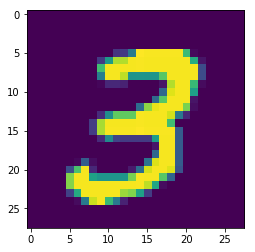

In [30]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[7])

###Preprocess input data for Keras.
>***A full-color image with all 3 RGB channels will have a depth of 3.Our MNIST images only have a depth of 1, but we must explicitly declare that.***

>***In other words, we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height)***.

In [0]:
#Converting/Reshaping 2-D dimenional Grayscale image to keras specific 4-D input/output form
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

###Preprocess class labels for Keras.
>***let's take a look at the shape of our class label data***

In [33]:
print(y_train.shape)

(60000,)


>***We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array.***

>***Let's take a look at the labels for the first 10 training samples:***

In [34]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

###And there's the problem. The y_train and y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values.

>***1. We can fix this easily:***

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

###Now have a look:

In [36]:
print (Y_train.shape)

(60000, 10)


In [37]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Define Model Architechture :

##Model Observation below:
>1. Start with Sequential Model
>2. Started Input image of 28x28x1 with kernal 3x3x1 splitted to 10 channels in Layer one
>3. Receptive field grown by 2 with each 3x3 convolution and doubles with MaxPool.
>4. I have 1x1 after two layers of 3x3 convoltion because initial features needs to be louder to perform better. 
>5. Then Added MaxPool to reduce parameter as model gets all edges and gradients in first two convolution, which helps to predict better, and also got foundation features of input image.
6. Then added 4 consecutive convolution of channels 16x16 with kernals of 3x3 to gets network depth and learn parts of object and objects as digit in MNIST.
7. At Last flatten all weights and given to prediction layer final output of 10 classes.

***NOTE:*** I have used 1x1 before maxpooling which helps network to learn more features if i used after Maxpooling it will reduces chances of getting featured less and won't helps in model.

In [38]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # Image size post Convolution:26 #RF :3

model.add(Convolution2D(16, 3, 3, activation='relu')) # Image size post Convolution:24 #RF 5
model.add(Convolution2D(10, 1, 1, activation='relu')) # Image size post Convolution:24 #RF 5
#model.add(Convolution2D(10, 3, 3, activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # Image size post Convoltution:12 #RF 10
#model.add(Convolution2D(10, 1, 1, activation='relu')) # 11

model.add(Convolution2D(16, 3, 3, activation='relu')) # Image size post Convolution:10 #RF 12
model.add(Convolution2D(16, 3, 3, activation='relu')) # Image size post Convolution:8 #RF 14
model.add(Convolution2D(16, 3, 3, activation='relu')) # Image size post Convolution:6 #RF 16
model.add(Convolution2D(16, 3, 3, activation='relu')) # Image size post Convolution:4 #RF 18

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your 

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 10)        170       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 16)        1456      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 16)          2320      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 6, 6, 16)          2320      
__________

###Compile the Model:
>***While compile the model we need to declare Loss Function and Optimizer***

>***Here we used Adam and categorical cross entropy as optimizer and loss function respectively***

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

###Now hard part over, we need to train the model as epochs and batch size on training data and do validation with test data parallaly with each epochs

In [41]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1, validation_data=(X_test,Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2918 - acc: 0.9095 - val_loss: 0.0953 - val_acc: 0.9683
Epoch 2/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0967 - acc: 0.9711 - val_loss: 0.0618 - val_acc: 0.9800
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0732 - acc: 0.9780 - val_loss: 0.0567 - val_acc: 0.9806
Epoch 4/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0601 - acc: 0.9810 - val_loss: 0.0555 - val_acc: 0.9824
Epoch 5/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0516 - acc: 0.9843 - val_loss: 0.0466 - val_acc: 0.9835
Epoch 6/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0456 - acc: 0.9856 - val_loss: 0.0411 - val_acc: 0.9866
Epoch 7/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0412 - acc: 0.9875 - val_loss: 0.0309 - val_ac

###Model Observation with logs:
>1. Model which includes Only BN and 1x1 convolution with maxpooling and approx. ***13k*** params.
>2. Loss of model is not good as it is vanilla version -1.
>3 highest validation Accuracy ***99.21*** with epochs ***20*** and batch size ***64***.

###Now Evaluating the model on test data 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [43]:
print(score)

[0.03187539158790605, 0.9901]


###Start Prediction on Test Data

In [0]:
y_pred = model.predict(X_test)

In [45]:
print(y_pred[:9])
print(y_test[:9])

[[2.0761101e-12 3.2895940e-08 1.7807968e-09 3.8929468e-07 1.5682252e-11
  7.1203243e-10 1.7160613e-20 9.9999905e-01 3.1444022e-10 4.8198177e-07]
 [1.3167438e-11 6.1292673e-09 1.0000000e+00 3.3508252e-13 1.6217974e-09
  3.2548204e-16 3.7303454e-09 2.3669480e-14 6.4297293e-13 6.5071899e-11]
 [1.1317336e-05 9.9916184e-01 5.6631951e-08 7.1115989e-09 6.9580783e-05
  8.1130040e-08 7.3801621e-04 7.5842547e-07 8.4096973e-06 9.9265617e-06]
 [9.9999154e-01 7.2416843e-11 1.5323199e-09 2.6878272e-10 7.3622907e-08
  1.1608536e-06 6.5236177e-06 1.6794625e-11 8.9186956e-11 6.7246776e-07]
 [3.4252511e-13 1.4520228e-09 3.0683380e-09 3.7480652e-13 9.9999547e-01
  6.1268133e-15 8.1299151e-10 6.9024566e-13 6.7270897e-11 4.4988010e-06]
 [7.7625549e-07 9.9994910e-01 7.5680511e-08 2.0918360e-10 2.2986984e-05
  8.0524622e-08 1.2569895e-05 3.2905768e-07 1.3798696e-05 1.3489529e-07]
 [7.8928482e-20 1.9300758e-07 2.7183411e-09 2.0144394e-13 9.9999964e-01
  9.3571547e-14 9.5742997e-15 2.2020765e-09 2.1428360e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

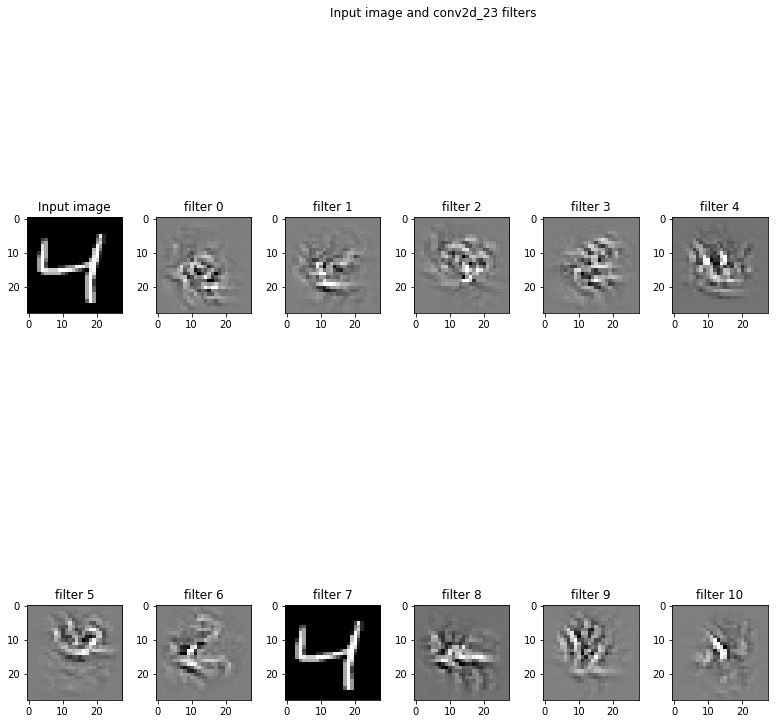

In [50]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_23'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()